# Boston Dataset

In [53]:
# importing required libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [54]:
# Loading the data from sklearn.datasets
boston = datasets.load_boston()
type(boston)

sklearn.utils.Bunch

In [55]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [56]:
x = boston.data
y = boston.target

In [57]:
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(506, 13)


In [58]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [59]:
# Converting the data into dataframe using pandas
df = pd.DataFrame(x)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [60]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [61]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [62]:
# splitting the data into testing and training data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x,y,random_state = 0)
print(X_train.shape)
print(X_test.shape)

(379, 13)
(127, 13)


In [63]:
alg1 = LinearRegression()

In [64]:
# Applying fit function on the training data
alg1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
# Predicting output for the test data
Y_pred = alg1.predict(X_test)

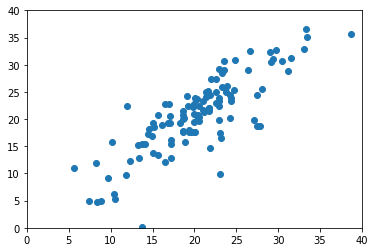

In [66]:
# Comparing Y_pred with Y_test
plt.scatter(Y_test,Y_pred)
plt.axis([0,40,0,40])
plt.show()

In [67]:
# Calculating score for the given data
score_test1 = alg1.score(X_test,Y_test)
score_train1 = alg1.score(X_train,Y_train)
score_test1,score_train1

(0.6354638433202129, 0.7697699488741149)

# USING DUMMY VARIABLES
### Adding more features to see if the accuracy increases.

In [68]:
boston = datasets.load_boston()
x = boston.data
y = boston.target

In [69]:
df = pd.DataFrame(x)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [70]:
# Adding squared values of each feature
for i in range(len(df.columns)):
    df[(str(df.columns[i])+'_'+str(df.columns[i]))] = df.iloc[:,i]**2

In [71]:
# Adding product values of two features
for i in range(13):
    for j in range(i+1,13):
        df[str(df.columns[i] + '_' + str(df.columns[j]))] = df.iloc[:,i]*df.iloc[:,j]

In [72]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,RAD_TAX,RAD_PTRATIO,RAD_B,RAD_LSTAT,TAX_PTRATIO,TAX_B,TAX_LSTAT,PTRATIO_B,PTRATIO_LSTAT,B_LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,296.0,15.3,396.90,4.98,4528.8,117482.40,1474.08,6072.570,76.194,1976.5620
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,484.0,35.6,793.80,18.28,4307.6,96049.80,2211.88,7064.820,162.692,3627.6660
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,484.0,35.6,785.66,8.06,4307.6,95064.86,975.26,6992.374,71.734,1583.1049
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,666.0,56.1,1183.89,8.82,4151.4,87607.86,652.68,7379.581,54.978,1160.2122
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,666.0,56.1,1190.70,15.99,4151.4,88111.80,1183.26,7422.030,99.671,2115.4770


In [73]:
df.shape

(506, 104)

In [74]:
x2 = df.values

In [75]:
#Splitting the data into training and testing data
X2_Train, X2_Test, Y2_Train, Y2_Test = model_selection.train_test_split(x2,y,random_state = 0)
print(X2_Train.shape)
print(X2_Test.shape)

(379, 104)
(127, 104)


In [76]:
# Training the linear regression algorithm
alg2 = LinearRegression()
alg2.fit(X2_Train,Y2_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
# Predicting the output for test data
Y2_pred = alg2.predict(X2_Test)

In [78]:
# Comparing scores of linear regression before and after use of dummy variables
score_test1 = alg1.score(X_test,Y_test)
score_train1 = alg1.score(X_train,Y_train)
score_train1,score_test1

(0.7697699488741149, 0.6354638433202129)

In [79]:
# Use of extra features have led to overfitting causing increase in accuracy in training data but decrease in testing data
score_test2 = alg2.score(X2_Test,Y2_Test)
score_train2 = alg2.score(X2_Train,Y2_Train)
score_train2,score_test2

(0.9520519609032728, 0.6074721959754708)